<a href="https://colab.research.google.com/github/DurdenTyler2008/University-of-AI/blob/main/Object%20Detection/SelectiveSearch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Обернуть в функцию этапы распознавания изображения. На вход должно подаваться исходное изображение. На выходе должно быть исходное изображение со всеми найденными bounding_box.

In [ ]:
%matplotlib inline

#%load_ext autoreload          #Автоматическая перезагрузка модулей при их изменении/обновлении

%autoreload 2

import keras
from google.colab import files

import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import time
import sys
from IPython.display import Image

###Загружаю и проверяю картинки самолетов:

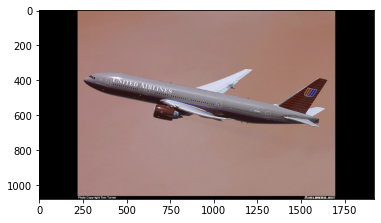

In [ ]:
im = cv2.imread('/content/drive/MyDrive/Самолеты_база/airplane_1.jpg')

%matplotlib inline
plt.imshow(im)
plt.show()

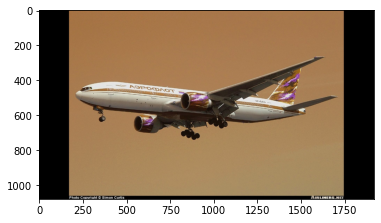

In [ ]:
im2 = cv2.imread('/content/drive/MyDrive/Самолеты_база/airplane_2.jpg')

%matplotlib inline
plt.imshow(im2)
plt.show()

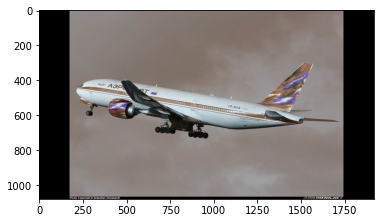

In [ ]:
im3 = cv2.imread('/content/drive/MyDrive/Самолеты_база/airplane_3.jpg')

%matplotlib inline
plt.imshow(im3)
plt.show()

In [ ]:
cv2.setUseOptimized(True)           #режим оптимизации
cv2.setNumThreads(8)                #количество потоков

###Функция создания объекта Selective Search Segmentation:

In [ ]:
def Selective_Search_Segmentation(picture):

    sss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    sss.setBaseImage(picture)
    sss.switchToSelectiveSearchQuality()  #метод
    rects = sss.process()

###Функция обработки изображения:

In [ ]:
def show_rectangle(picture):
    
    numShowRects = 2000                         # кол-во region proposals (прямоугольников, описывающих объект)
    imOut = picture.copy() 

    for i, rect in enumerate(rects):            
      if i < numShowRects:                      # пока не наберётся numShowRects кол-во прямоугольников
        x, y, w, h = rect                       # x,y - координаты точки вершины; w, h - шаги от вершины вправо, вниз
        cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA) #метод нарисует на изображении прямоугольник по указанным параметрам
      else: 
        break 

    plt.imshow(imOut) 
    plt.show()

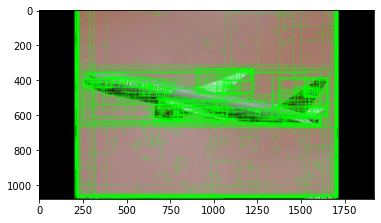

Обработка заняла:  1.86 min


In [ ]:
curTime = time.time()

Selective_Search_Segmentation(im)
show_rectangle(im)

print('Обработка заняла: ', round((time.time() - curTime) / 60, 2), 'min')

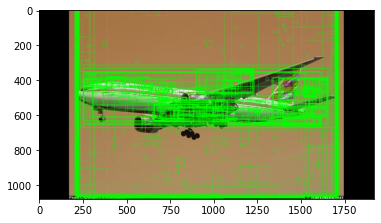

Обработка заняла:  1.87 min


In [ ]:
curTime = time.time()

Selective_Search_Segmentation(im2)
show_rectangle(im2)

print('Обработка заняла: ', round((time.time() - curTime) / 60, 2), 'min')

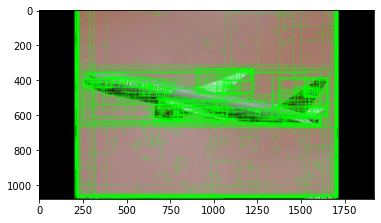

Обработка заняла:  2.22 min


In [ ]:
curTime = time.time()

Selective_Search_Segmentation(im3)
show_rectangle(im)

print('Обработка заняла: ', round((time.time() - curTime) / 60, 2), 'min')